# Ideas for generating random signals

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use(['science', 'notebook'])

# Time series signal with some random normal noise

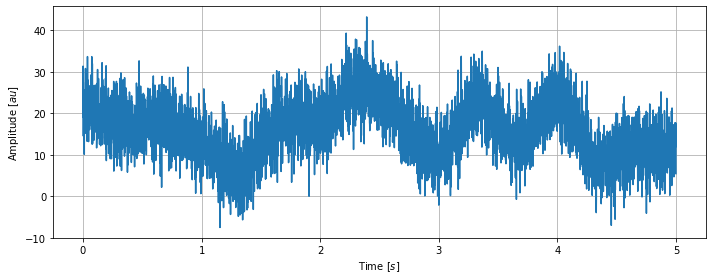

In [2]:
# create signal
srate = 1000  # Hz
time = np.arange(0, 5, 1 / srate)
n = len(time)
p = 15  # poles for random interpolation

# noise level, measured in standard deviations
noiseamp = 5

# amplitude modulator and noise level
ampl = np.interp(np.linspace(0, p, n), np.arange(0, p), np.random.rand(p) * 30)
noise = noiseamp * np.random.randn(n)
signal = ampl + noise

# show the singal
plt.figure(figsize=(10, 4))
plt.plot(time, signal, "-")
plt.grid()
plt.xlabel("Time [$s$]")
plt.ylabel("Amplitude [$au$]")
plt.tight_layout()
plt.show()


# Gaussian kernel using FWHM

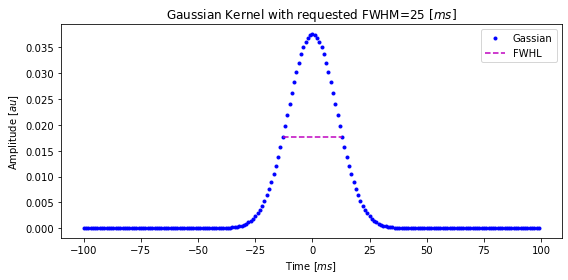

In [3]:
## create Gaussian kernel
# full-width half-maximum: the key Gaussian parameter
fwhm = 25  # in ms

srate = 1000  # Hz
time = np.arange(0, 5, 1 / srate)

# normalized time vector in ms
k = 100
gtime = 1000 * np.arange(-k, k) / srate

# create Gaussian window
gauswin = np.exp(-(4 * np.log(2) * gtime**2) / fwhm**2)

# compute empirical FWHM
pstPeakHalf = k + np.argmin((gauswin[k:] - 0.5) ** 2)
prePeakHalf = np.argmin((gauswin - 0.5) ** 2)

empFWHM = gtime[pstPeakHalf] - gtime[prePeakHalf]

# then normalize Gaussian to unit energy
gauswin = gauswin / np.sum(gauswin)

# plot the signal
plt.figure(figsize=(8, 4))
plt.plot(gtime, gauswin, "b.", label="Gassian")
plt.plot(
    [gtime[prePeakHalf], gtime[pstPeakHalf]],
    [gauswin[prePeakHalf], gauswin[pstPeakHalf]],
    "m--",
    label="FWHL",
)
plt.xlabel("Time [$ms$]")
plt.ylabel("Amplitude [$au$]")
plt.title(f"Gaussian Kernel with requested FWHM={fwhm} [$ms$]")
plt.legend()
plt.tight_layout()
plt.show()


# A spike time series

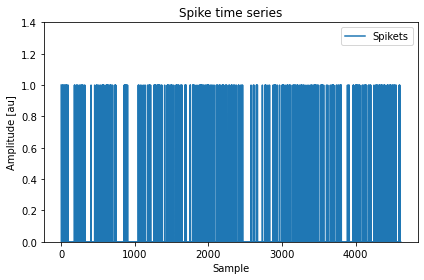

In [4]:
## generate time series of random spikes

# number of spikes
n = 300

# inter-spike intervals (exponential distribution for bursts)
isi = np.round(np.exp(np.random.randn(n)) * 10)

# generate spike time series
spikets = np.zeros(int(sum(isi)))

for i in range(0, n):
    spikets[int(np.sum(isi[0:i]))] = 1

plt.figure(figsize=(6, 4))
plt.plot(spikets, label='Spikets')
plt.ylim([0,1.4])
plt.xlabel('Sample')
plt.ylabel('Amplitude [au]')
plt.title('Spike time series')
plt.legend()
plt.tight_layout()
plt.show()


# A recorded EMG data 

In [5]:
import scipy.io as sio

# import data
emgdata = sio.loadmat('data/emg-sample-data.mat')

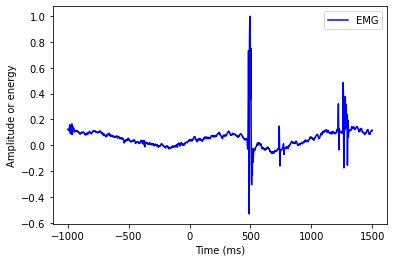

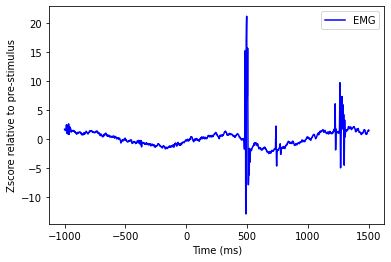

In [6]:
import scipy.io as sio
import copy

# import data
emgdata = sio.loadmat('data/emg-sample-data.mat')

# extract needed variables
emgtime = emgdata['emgtime'][0]
emg  = emgdata['emg'][0]

# find timepoint zero
time0 = np.argmin(emgtime**2)

# convert original EMG to z-score from time-zero
emgZ = (emg-np.mean(emg[0:time0])) / np.std(emg[0:time0])

## plot
# plot "raw" (normalized to max.1)
plt.figure(figsize=(6,4))
plt.plot(emgtime,emg/np.max(emg),'b',label='EMG')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude or energy')
plt.legend()
plt.show()

# plot zscored
plt.figure(figsize=(6,4))
plt.plot(emgtime,emgZ,'b',label='EMG')
plt.xlabel('Time (ms)')
plt.ylabel('Zscore relative to pre-stimulus')
plt.legend()
plt.show()

# A time series with spike noise 

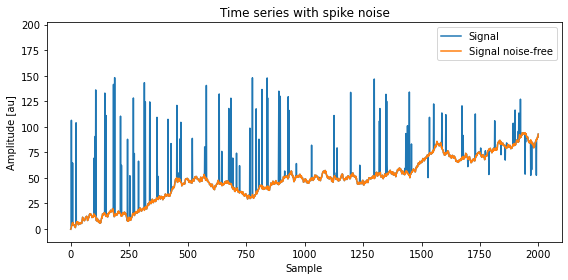

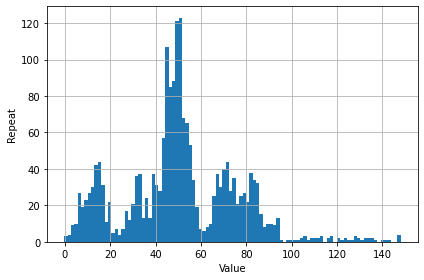

In [7]:
# create signal
n = 2000
signal = np.cumsum(np.random.randn(n)) # + np.linspace(-30,30,n) # linear trend
signal_pure = copy.deepcopy(signal)

# proportion of time points to replace with noise
propnoise = 0.05

# find noise points
noisepnts = np.random.permutation(n)
noisepnts = noisepnts[0 : int(n * propnoise)]

# generate signal and replace points with noise
signal[noisepnts] = 50 + np.random.rand(len(noisepnts)) * 100

# plot signal and histogram
plt.figure(figsize=(8, 4))
plt.plot(signal, label="Signal")
plt.plot(signal_pure, label="Signal noise-free")
plt.ylim([signal.min()-np.std(signal)/2, signal.max()+np.std(signal)*2.2])
plt.xlabel("Sample")
plt.ylabel("Amplitude [au]")
plt.title("Time series with spike noise")
plt.legend()
plt.tight_layout()
plt.show()

# # use hist to pick threshold
plt.figure(figsize=(6, 4))
plt.hist(signal, 100)
plt.ylabel("Repeat")
plt.xlabel("Value")
plt.grid()
plt.tight_layout()
plt.show()


# Signal with slow polynomial artifact

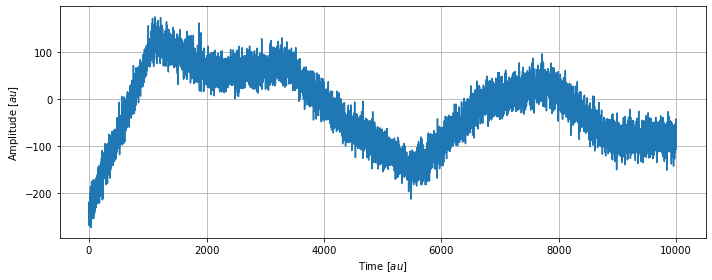

In [8]:
## generate signal with slow polynomial artifact

n = 10000
t = range(0,n)
k = 10 # number of poles for random amplitudes

slowdrift = np.interp(np.linspace(1,k,n),np.arange(0,k),100*np.random.randn(k))
signal = slowdrift + 20*np.random.randn(n)

# show the singal
plt.figure(figsize=(10, 4))
plt.plot(t, signal, "-")
plt.grid()
plt.xlabel("Time [$au$]")
plt.ylabel("Amplitude [$au$]")
plt.tight_layout()
plt.show()

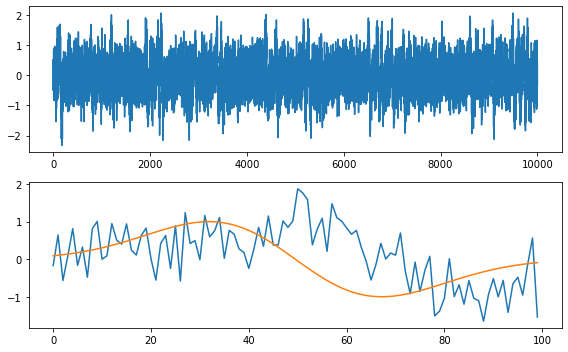

In [9]:
## simulate data

%matplotlib inline


# create event (derivative of Gaussian)
k = 100 # duration of event in time points
event = np.diff(np.exp( -np.linspace(-2,2,k+1)**2 ))
event = event/np.max(event) # normalize to max=1

# event onset times
Nevents = 30
onsettimes = np.random.permutation(10000-k)
onsettimes = onsettimes[0:Nevents]

# put event into data
data = np.zeros(10000)
for ei in range(0,Nevents):
    data[onsettimes[ei]:onsettimes[ei]+k] = event

# add noise
data = data + .5*np.random.randn(len(data))

# plot data
plt.figure(figsize=(8,5))
plt.subplot(211)
plt.plot(data)

# plot one event
plt.subplot(212)
plt.plot(range(0,k), data[onsettimes[3]:onsettimes[3]+k])
plt.plot(range(0,k), event)
plt.tight_layout()
plt.show()

# Generate a multispectral noisy signal

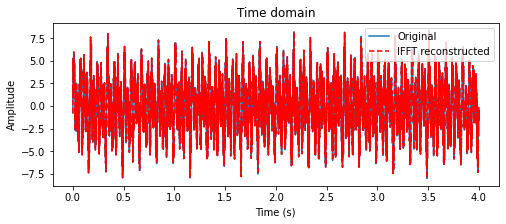

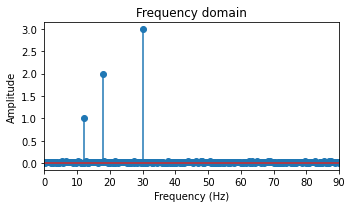

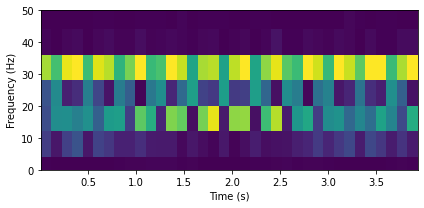

In [10]:
## Generate a multispectral noisy signal
import scipy.fftpack
import scipy.signal

# simulation parameters
srate = 2054  # in Hz
npnts = srate * 4  # 4 seconds
time = np.arange(0, npnts) / srate

# frequencies to include
frex = [12, 18, 30]

signal = np.zeros(len(time))

# loop over frequencies to create signal
for fi in range(0, len(frex)):
    signal = signal + (fi + 1) * np.sin(2 * np.pi * frex[fi] * time)

# add some noise
signal = signal + np.random.randn(len(signal))

# amplitude spectrum via Fourier transform
signalX = scipy.fftpack.fft(signal)
signalAmp = 2 * np.abs(signalX) / npnts

# vector of frequencies in Hz
hz = np.linspace(0, srate / 2, int(np.floor(npnts / 2) + 1))

## plots
plt.figure(figsize=(8,3))
plt.plot(time, signal, label="Original")
plt.plot(time, np.real(scipy.fftpack.ifft(signalX)), "r--", label="IFFT reconstructed")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time domain")
plt.legend()
plt.show()

plt.figure(figsize=(5,3))
plt.stem(hz, signalAmp[0 : len(hz)])
plt.xlim([0, np.max(frex) * 3])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Frequency domain")
plt.tight_layout()
plt.show()

# time-frequency analysis via spectrogram
frex, time, pwr = scipy.signal.spectrogram(signal, srate)

plt.figure(figsize=(6,3))
plt.pcolormesh(time, frex, pwr, vmin=0, vmax=0.5)
plt.ylim(0,50)
plt.xlabel("Time (s)"), plt.ylabel("Frequency (Hz)")
plt.tight_layout()
plt.show()


# A simple signal with bumping frequency domain response

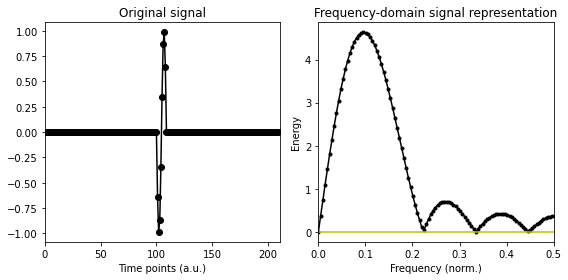

In [11]:
from scipy import fftpack

# create a simple signal
data = np.concatenate(
    (np.zeros(100), np.cos(np.linspace(np.pi / 2, 5 * np.pi / 2, 10)), np.zeros(100)),
    axis=0,
)
n = len(data)

# plot it and its power spectrum
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(range(0, n), data, "ko-")
plt.xlim([0, n + 1])
plt.title("Original signal")
plt.xlabel("Time points (a.u.)")

plt.subplot(122)
plt.plot(np.linspace(0, 1, n), np.abs(fftpack.fft(data)), "k.-")
plt.axhline(0,color='y')
plt.xlim([0, 0.5])
plt.xlabel("Frequency (norm.)")
plt.ylabel("Energy")
plt.title("Frequency-domain signal representation")
plt.tight_layout()
plt.show()


# A signal with frequency pick at $f = 0.2 [hz]$

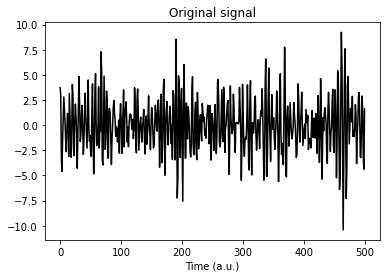

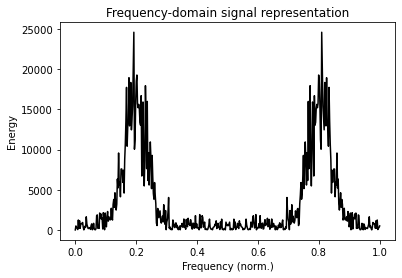

In [12]:
# create a signal
N = 500
hz = np.linspace(0, 1, N)
gx = np.exp(-((4 * np.log(2) * (hz - 0.2) / 0.2) ** 2)) * N / 2
data = np.real(fftpack.ifft(gx * np.exp(1j * np.random.rand(N) * 2 * np.pi)))
data = data + np.random.randn(N)

# plot it and its power spectrum
plt.plot(range(0, N), data, "k")
plt.title("Original signal")
plt.xlabel("Time (a.u.)")
plt.show()

plt.plot(hz, np.abs(fftpack.fft(data)) ** 2, "k")
# plt.xlim([0, 0.5])
plt.xlabel("Frequency (norm.)")
plt.ylabel("Energy")
plt.title("Frequency-domain signal representation")
plt.show()


# A signal and noisy version of it

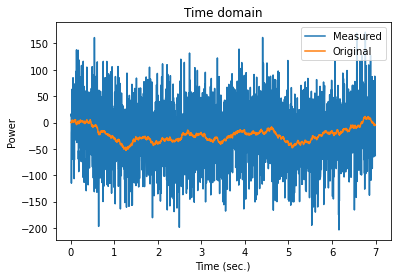

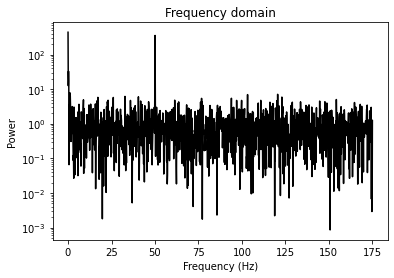

In [13]:
# simulation parameters
fs = 350  # hz
timevec = np.arange(0, fs * 7 - 1) / fs
npnts = len(timevec)

# generate signal
yOrig = np.cumsum(np.random.randn(npnts))
y = yOrig + 50 * np.random.randn(npnts) + 40 * np.sin(2 * np.pi * 50 * timevec)

# power spectrum of signal
yX = np.abs(fftpack.fft(y) / npnts) ** 2
hz = np.linspace(0, fs / 2, int(np.floor(npnts / 2) + 1))


# plot the data
plt.figure()
plt.plot(timevec, y, label="Measured")
plt.plot(timevec, yOrig, label="Original")
plt.xlabel("Time (sec.)")
plt.ylabel("Power")
plt.title("Time domain")
plt.legend()
plt.show()

# plot its power spectrum
plt.figure()
plt.plot(hz, yX[0 : len(hz)], "k")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title("Frequency domain")
plt.yscale("log")
plt.show()


# Windowed Sinc Signal and filter + applying to noisy data

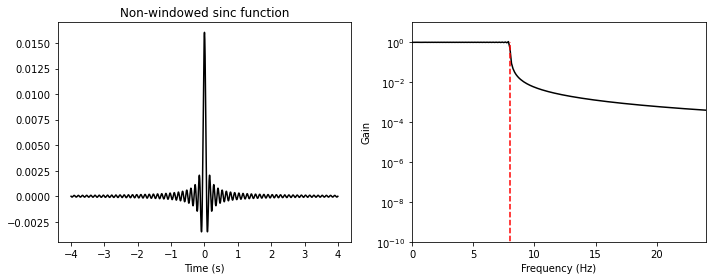

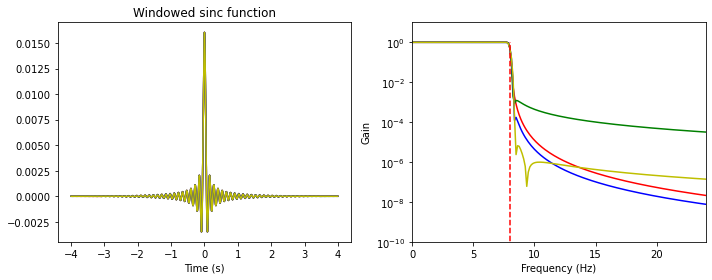

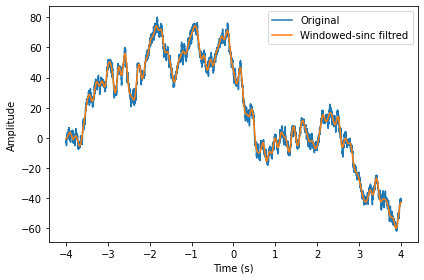

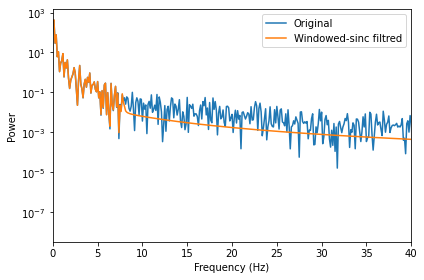

In [14]:
from scipy import signal

# simulation params
srate = 1000
time = np.arange(-4, 4, 1 / srate)
pnts = len(time)

# create sinc function
f = 8
sincfilt = np.sin(2 * np.pi * f * time) / time

# adjust NaN and normalize filter to unit-gain
sincfilt[~np.isfinite(sincfilt)] = np.max(sincfilt)
sincfilt = sincfilt / np.sum(sincfilt)

# windowed sinc filter
sincfiltW = sincfilt * np.hanning(pnts)
sincfiltW2 = sincfilt * np.hamming(pnts)
sincfiltW3 = sincfilt * np.blackman(pnts)
sincfiltW4 = sincfilt * np.kaiser(pnts, beta=10)


# plot the sinc filter
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(time, sincfilt, "k")
plt.xlabel("Time (s)")
plt.title("Non-windowed sinc function")

# plot the power spectrum
plt.subplot(122)
hz = np.linspace(0, srate / 2, int(np.floor(pnts / 2) + 1))
pw = np.abs(fftpack.fft(sincfilt))
plt.plot(hz, pw[: len(hz)], "k")
plt.xlim([0, f * 3])
plt.yscale("log")
plt.plot([f, f], [0, 1], "r--")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.ylim([10**-10, 10])
plt.tight_layout()
plt.show()

# now plot the windowed sinc filter
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(time, sincfiltW, "r")
plt.plot(time, sincfiltW2, "g")
plt.plot(time, sincfiltW3, "b")
plt.plot(time, sincfiltW4, "y")
plt.xlabel("Time (s)")
plt.title("Windowed sinc function")

plt.subplot(122)
pw = np.abs(fftpack.fft(sincfiltW))
pw2 = np.abs(fftpack.fft(sincfiltW2))
pw3 = np.abs(fftpack.fft(sincfiltW3))
pw4 = np.abs(fftpack.fft(sincfiltW4))
plt.plot(hz, pw[: len(hz)],'r')
plt.plot(hz, pw2[: len(hz)],'g')
plt.plot(hz, pw3[: len(hz)],'b')
plt.plot(hz, pw4[: len(hz)],'y')
plt.xlim([0, f * 3])
plt.yscale("log")
plt.plot([f, f], [0, 1], "r--")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.ylim([10**-10, 10])
plt.tight_layout()
plt.show()

## apply the filter to noise

# generate data as integrated noise
data = np.cumsum(np.random.randn(pnts))

# reflection
datacat = np.concatenate((data, data[::-1]), axis=0)

# apply filter (zero-phase-shift)
dataf = signal.lfilter(sincfiltW, 1, datacat)
dataf = signal.lfilter(sincfiltW, 1, dataf[::-1])

# flip forwards and remove reflected points
dataf = dataf[-1 : pnts - 1 : -1]

# compute spectra of original and filtered signals
powOrig = np.abs(fftpack.fft(data) / pnts) ** 2
powFilt = np.abs(fftpack.fft(dataf) / pnts) ** 2


# plot
plt.figure()
plt.plot(time, data, label="Original")
plt.plot(time, dataf, label="Windowed-sinc filtred")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()


# plot original and filtered spectra
plt.figure()
plt.plot(hz, powOrig[: len(hz)], label="Original")
plt.plot(hz, powFilt[: len(hz)], label="Windowed-sinc filtred")
plt.xlim([0, 40])
plt.yscale("log")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.legend()
plt.tight_layout()
plt.show()


# A signal with gaussian spectrum + $1/f$ noise 

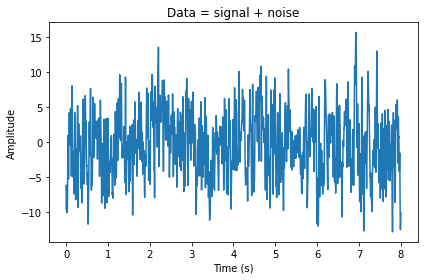

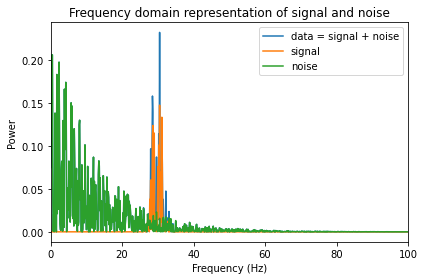

In [15]:
# generate 1/f noise
N = 8000
fs = 1000
as1 = np.random.rand(N) * np.exp(-np.arange(0, N) / 200)
fc = as1 * np.exp(1j * 2 * np.pi * np.random.rand(len(as1)))
noise = np.real(scipy.fftpack.ifft(fc)) * N


### create frequency-domain Gaussian
hz = np.linspace(0, fs, N)
s = 4 * (2 * np.pi - 1) / (4 * np.pi)
# normalized width
x = hz - 30  # shifted frequencies
fg = np.exp(-0.5 * (x / s) ** 2)  # gaussian

fc = np.random.rand(N) * np.exp(1j * 2 * np.pi * np.random.rand(N))
fc = fc * fg

# generate signal from Fourier coefficients, and add noise
signal1 = np.real(scipy.fftpack.ifft(fc)) * N
data = signal1 + noise
time = np.arange(0, N) / fs


### plot the data
plt.plot(time, data)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Data = signal + noise")
plt.tight_layout()
plt.show()

plt.plot(hz, np.abs(scipy.fftpack.fft(data) / N) ** 2, label="data = signal + noise")
plt.plot(hz, np.abs(scipy.fftpack.fft(signal1) / N) ** 2, label="signal")
plt.plot(hz, np.abs(scipy.fftpack.fft(noise) / N) ** 2, label="noise")
plt.legend()
plt.xlim([0, 100])
plt.title("Frequency domain representation of signal and noise")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.tight_layout()
plt.show()


# A recorded signal with electrical noise and it's harmonics 

In [22]:
import scipy.io as sio

# load data
linedata = sio.loadmat("data/lineNoiseData.mat")
data = np.squeeze(linedata["data"])
srate = linedata["srate"][0]

# time vector
pnts = len(data)
time = np.arange(0, pnts) / srate
time = time.T

# compute power spectrum and frequencies vector
pwr = np.abs(scipy.fftpack.fft(data) / pnts) ** 2
hz = np.linspace(0, srate, pnts)


### plotting
# time-domain signal
plt.figure()
plt.subplot(121)
plt.plot(time[0:-1:1000], data[0:-1:1000], "k")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time domain")

# plot power spectrum
plt.subplot(122)
plt.plot(hz, pwr, "k")
plt.xlim([0, 400])
plt.ylim([0, 2])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title("Frequency domain")
plt.tight_layout()
plt.show()

frex2notch = 50

# initialize filtered signal
datafilt = data

# create filter kernel using firwin (fir1 in MATLAB)
frange = [frex2notch - 0.5, frex2notch + 0.5]
order = int(150 * (srate / frange[0]))
order = order + ~order % 2  # ensure to have an odd order

# filter kernel
filtkern = signal.firwin(order, frange, pass_zero=True, fs=srate)

# visualize the kernel and its spectral response
plt.figure()
plt.subplot(121)
plt.plot(filtkern)
plt.title("Time domain")

plt.subplot(122)
plt.plot(np.linspace(0, srate, 10000), np.abs(scipy.fftpack.fft(filtkern, 10000)) ** 2)
plt.xlim([frex2notch - 30, frex2notch + 30])
plt.title("Frequency domain")
plt.tight_layout()
plt.show()

# recursively apply to data
datafilt = signal.filtfilt(filtkern, 1, datafilt)

### plot the signal
plt.figure()
plt.subplot(121)
plt.plot(time, data, "k", label="Original")
plt.plot(time, datafilt, "r", label="Notched")
plt.xlabel("Time (s)")
plt.legend()

# compute the power spectrum of the filtered signal
pwrfilt = np.abs(scipy.fftpack.fft(datafilt) / pnts) ** 2

# plot power spectrum
plt.subplot(122)
plt.plot(hz, pwr, "k", label="Original")
plt.plot(hz, pwrfilt, "r", label="Notched")
plt.xlim([0, 400])
plt.ylim([0, 2])
plt.title("Frequency domain")
plt.tight_layout()
plt.show()


# Bird song signal

In [35]:
import scipy.io.wavfile

# load in birdcall
fs, bc = scipy.io.wavfile.read("data/XC403881.wav")

# time-frequency analysis via spectrogram (see section on spectral methods)
frex, time, pwr = scipy.signal.spectrogram(bc[:, 0], fs)
plt.figure()
plt.pcolormesh(time, frex, pwr, vmin=0, vmax=9)
plt.xlabel("Time (s)"), plt.ylabel("Frequency (Hz)")

# frequency ranges
frange = [[1700, 2600], [5100, 6100]]

# draw boundary lines on the plot
colorz = "wm"
for fi in range(0, len(frange)):
    plt.axhline(frange[fi][0], linewidth=4, color=colorz[fi], linestyle="--")
    plt.axhline(frange[fi][1], linewidth=4, color=colorz[fi], linestyle="--")

plt.show()

## compute and apply FIR filters

# initialize output matrix
filteredSig = np.zeros((2, 2, len(bc)))

# loop over filters
for filteri in range(len(frange)):

    # design filter kernel
    order = round(10 * (fs / frange[filteri][0]))
    order += ~order % 2
    filtkern = signal.firwin(order, frange[filteri], fs=fs, pass_zero=False)

    # loop over channels
    for chani in range(2):

        # get data from this channel
        dat1chan = bc[:, chani]

        # zero-phase-shift filter
        fsig = signal.filtfilt(filtkern, 1, dat1chan)
        # enter into the matrix
        filteredSig[filteri, chani, :] = fsig

from IPython.display import Audio

# # lower frequency range
# Audio(np.array(filteredSig[0,0,:]), rate=fs)

# higher frequency range
Audio(np.array(filteredSig[1, 0, :]), rate=fs)

# scipy.io.wavfile.write("result-low-frex.wav", fs, np.array(filteredSig[0, 0, :]).astype(np.int16))
# scipy.io.wavfile.write("result-high-frex.wav", fs, np.array(filteredSig[1, 0, :]).astype(np.int16))
